### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

#### Source of this data set
https://archive.ics.uci.edu/dataset/603/in+vehicle+coupon+recommendation

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [100]:
data = pd.read_csv('data/coupons.csv')
data.sample(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
7252,Home,Alone,Sunny,30,6PM,Carry out & Take away,2h,Male,50plus,Married partner,...,1~3,gt8,4~8,less1,1,1,0,1,0,1
10480,Work,Alone,Sunny,30,7AM,Bar,1d,Female,31,Unmarried partner,...,less1,1~3,1~3,less1,1,1,0,1,0,0


2. Investigate the dataset for missing or problematic data.

In [89]:
# find null or missing values
columns_with_nulls = data.isna().sum()

# find % of missing values
columns_with_nulls = (columns_with_nulls[columns_with_nulls.values > 0]/len(data))
columns_with_nulls


car                     0.991485
Bar                     0.008436
CoffeeHouse             0.017108
CarryAway               0.011905
RestaurantLessThan20    0.010249
Restaurant20To50        0.014901
dtype: float64

In [90]:
print(data['CoffeeHouse'].value_counts())

CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64


These categorical values are same for the following columns:'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50'

3. Decide what to do about your missing data -- drop, replace, other...

In [91]:
# remove car column since car column is missing > 95% of its values

# drop columns where missing values > 95%
clean_data = data.drop(columns = columns_with_nulls[columns_with_nulls > 0.95].index)

# for columns with < 1 % missing values, fill values of the most common value observed in that column in the data set
clean_data['Bar'] = data['Bar'].fillna('never')
clean_data['CoffeeHouse'] = data['CoffeeHouse'].fillna('less1')
clean_data['CarryAway'] = data['CarryAway'].fillna('1~3')
clean_data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('1~3')
clean_data['Restaurant20To50'] = data['Restaurant20To50'].fillna('less1')

# for the columns 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50' 
#       the value never and less1, appear to denote the same meaning. So we will update the values with never, where less1 is present
clean_data['Bar'] = clean_data['Bar'].map(lambda x: 'never' if x == 'less1' else x)
clean_data['CoffeeHouse'] = clean_data['CoffeeHouse'].map(lambda x: 'never' if x == 'less1' else x)
clean_data['CarryAway'] = clean_data['CarryAway'].map(lambda x: 'never' if x == 'less1' else x)
clean_data['RestaurantLessThan20'] = clean_data['RestaurantLessThan20'].map(lambda x: 'never' if x == 'less1' else x)
clean_data['Restaurant20To50'] = clean_data['Restaurant20To50'].map(lambda x: 'never' if x == 'less1' else x)

clean_data['Y-new'] = clean_data['Y'].map(lambda x: "Coupon Accepted" if x == 1 else "Did Not Accept Coupon")

clean_data['direction_same_new'] = clean_data['direction_same'].map(lambda x: "Same direction" if x == 1 else "Opposite direction")


# drop duplicates
clean_data = clean_data.drop_duplicates()
print(len(clean_data))

clean_data.sample(2)

12596


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Y-new,direction_same_new
2467,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,never,1,0,0,0,1,0,Did Not Accept Coupon,Opposite direction
9397,Work,Alone,Rainy,55,7AM,Carry out & Take away,2h,Male,21,Single,...,4~8,1~3,1,1,0,1,0,1,Coupon Accepted,Same direction


### Seaborn plotting help function

In [118]:
# Helper function to create seaborn plots that share the same appearance attributes
#   such as: heading, title, x-y labels, and placement of the legend
# 
def render_plot(ax, heading, subtitle, xlabel, ylabel, rotation=20):
    
    plt.suptitle(heading, fontsize = 18)                        # main heading of the plot
    plt.title(subtitle, fontsize = 12)                          # sub title of the plot
    ax.set(xlabel=xlabel, ylabel=ylabel)                        # x and y labels
    
    for i in ax.containers:
        ax.bar_label(i,)                                        # display values on bars
        
    #ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
        
    for patch in ax.patches:                                    # remove bars that do not have any values
        if patch.get_height() == 0: 
            patch.set_visible(False)
    
    if ax.get_legend():                                         # if legend is present, set the location to upper right
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))     
        
    ax.tick_params(rotation=rotation)                           # rotate the labels


In [93]:
sns.set_palette('pastel')

4. What proportion of the total observations chose to accept the coupon?



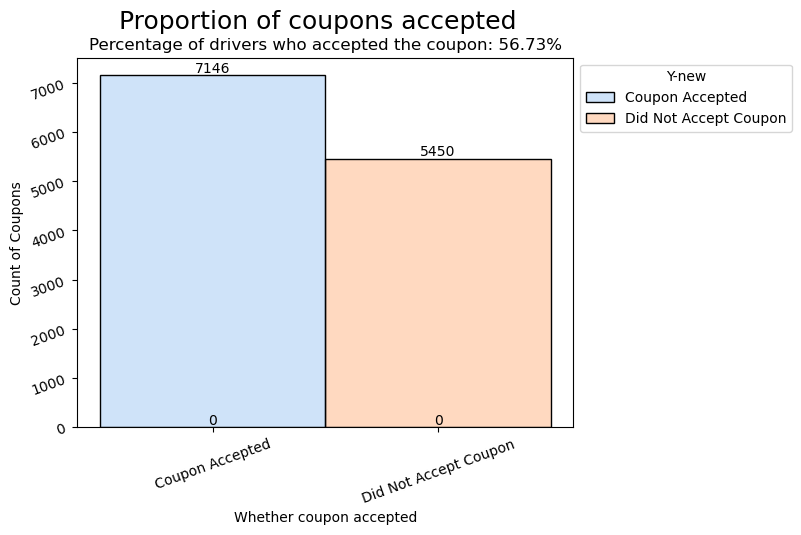

In [119]:
ax = sns.histplot(clean_data, x= 'Y-new', hue='Y-new', bins=2)
    
proportion_accepted_coupon = (len(clean_data[clean_data['Y']==1])/len(clean_data)) * 100
proportion_accepted_coupon = format(proportion_accepted_coupon, ".2f")
    
heading = 'Proportion of coupons accepted'
subtitle = "Percentage of drivers who accepted the coupon: " + proportion_accepted_coupon + "%"

render_plot(ax, heading = heading, subtitle = subtitle, 
            xlabel = 'Whether coupon accepted', 
            ylabel = 'Count of Coupons')

5. Use a bar plot to visualize the `coupon` column.

### Visualize coupon distribution by coupon type

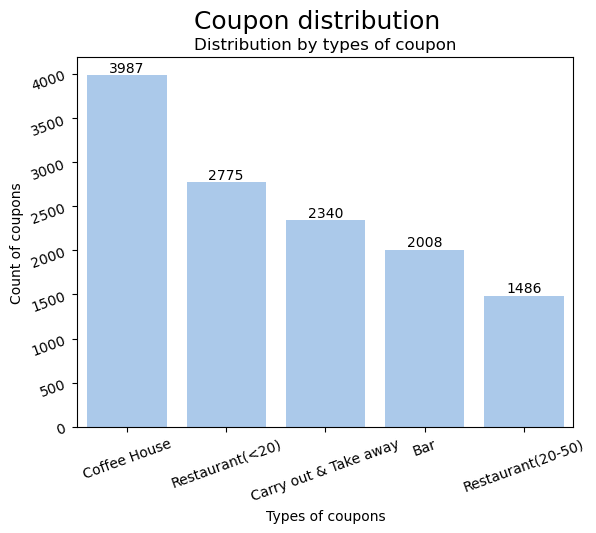

In [121]:
ax = sns.barplot(clean_data.coupon.value_counts())

render_plot(ax,'Coupon distribution', 
            subtitle = 'Distribution by types of coupon', 
            xlabel = 'Types of coupons', 
            ylabel = 'Count of coupons')


6. Use a histogram to visualize the temperature column.

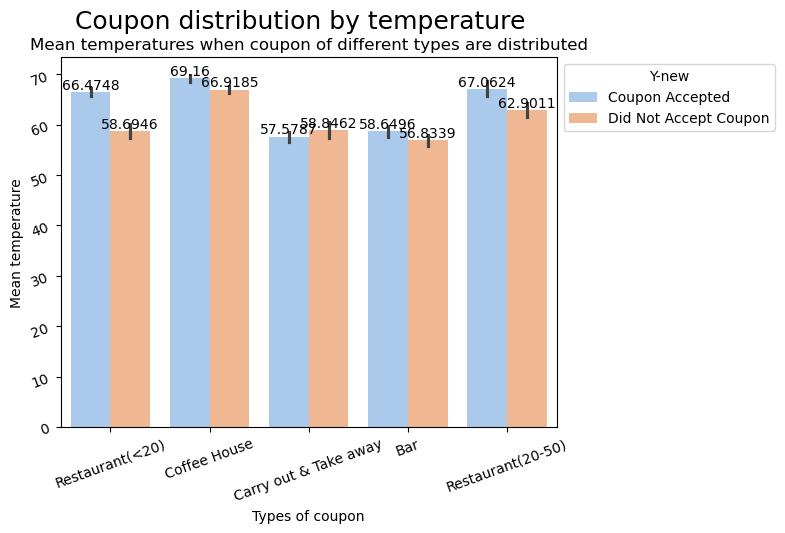

In [122]:
ax = sns.barplot(clean_data, 
                 x='coupon', 
                 y ='temperature', 
                 hue='Y-new',
                 estimator = 'mean'
                 )

render_plot(ax, heading = 'Coupon distribution by temperature', 
                subtitle='Mean temperatures when coupon of different types are distributed',
                xlabel = 'Types of coupon',
                ylabel= 'Mean temperature')


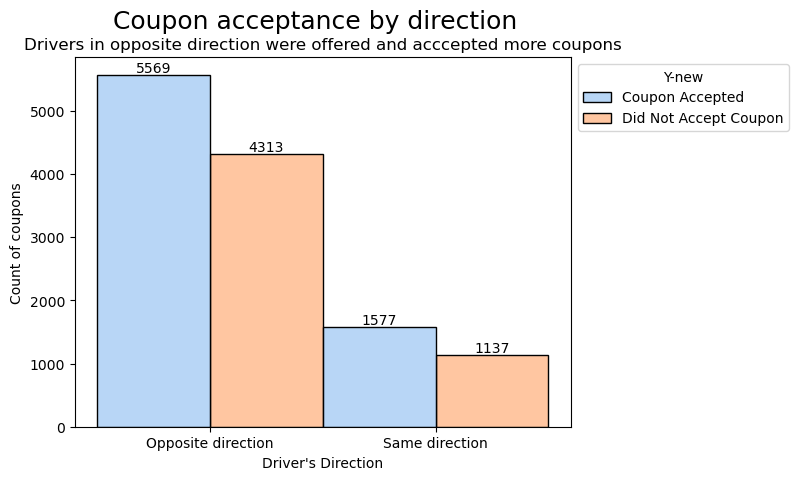

In [133]:
ax = sns.histplot(clean_data, 
                 x ='direction_same_new', 
                 multiple="dodge",
                 hue='Y-new'
                 )

render_plot(ax, heading = 'Coupon acceptance by direction', 
                subtitle='Drivers in opposite direction were offered and acccepted more coupons',
                xlabel = "Driver's Direction",
                ylabel= 'Count of coupons', 
                rotation=0)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


2. What proportion of bar coupons were accepted?


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  